In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
tf.__version__

'2.14.0'

### Prepare ImageDataGenerator
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [2]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                            #rotation_range=90,
                            brightness_range=(0.5,1), 
                            #shear_range=0.2, 
                            #zoom_range=0.2,
                            channel_shift_range=0.2,
                            #horizontal_flip=True,
                            #vertical_flip=True,
                            rescale=1./255,
                            validation_split=0.3)

### Prepare img_generator_flow

In [3]:
root_dir = '/Users/tanishq/Downloads/sih code boat /data'

img_generator_flow_train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=16,
    shuffle=True,
    subset="training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=16,
    shuffle=True,
    subset="validation")

Found 2051 images belonging to 10 classes.
Found 873 images belonging to 10 classes.


In [4]:
data_dir='/Users/tanishq/Downloads/sih code boat /data'
Names0 = os.listdir(data_dir)
Names=sorted(Names0)
print(Names)
print(len(Names))

['.DS_Store', 'boats', 'buoy', 'cruise ship', 'ferry boat', 'freight boat', 'gondola', 'inflatable boat', 'kayak', 'paper boat', 'sailboat']
11


In [5]:
N=list(range(len(Names)))
normal_mapping=dict(zip(Names,N))
reverse_mapping=dict(zip(N,Names))

### Visualize a batch of images

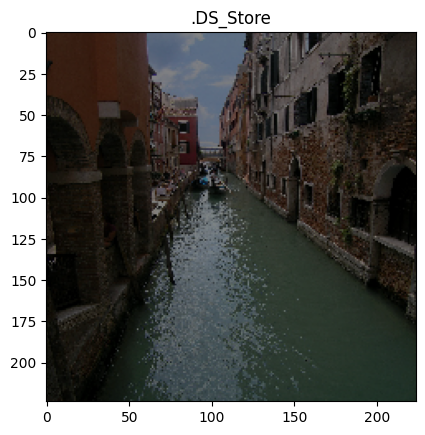

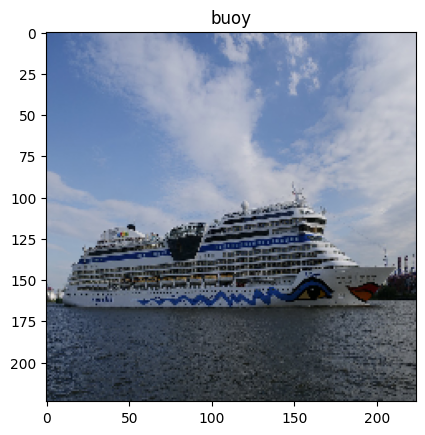

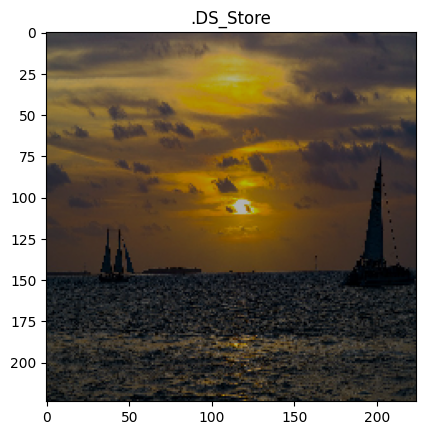

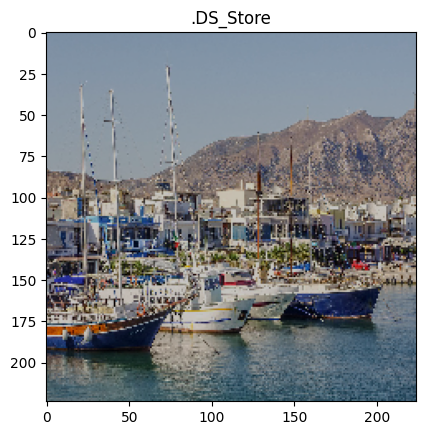

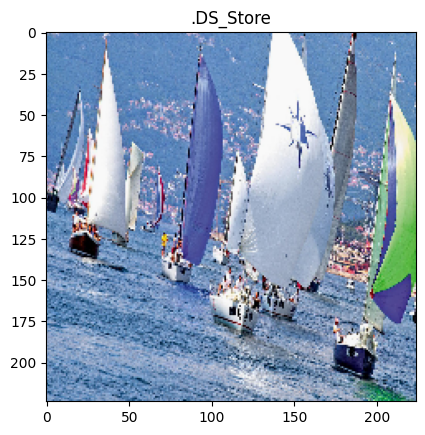

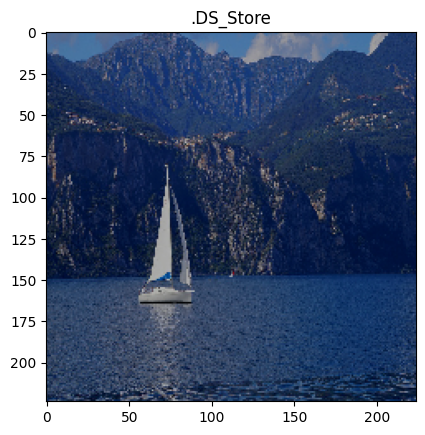

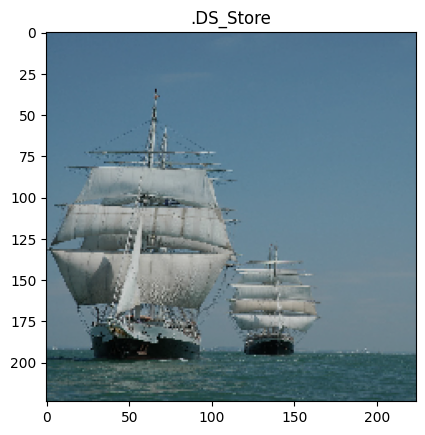

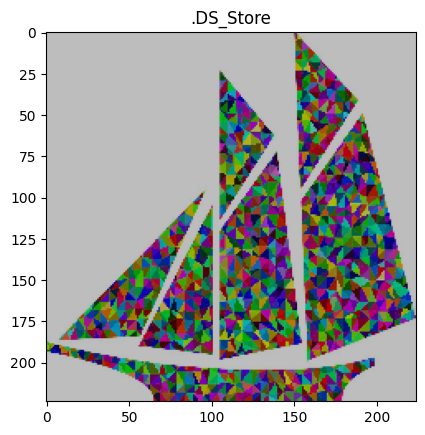

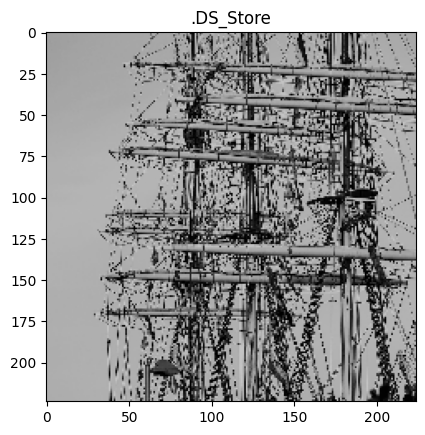

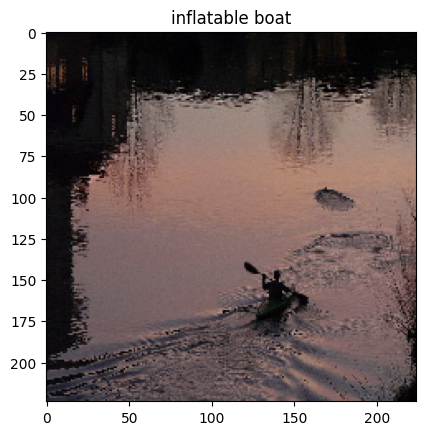

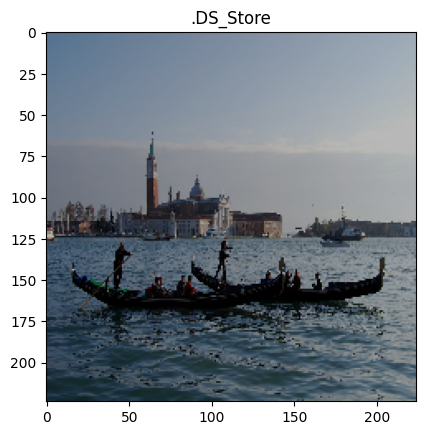

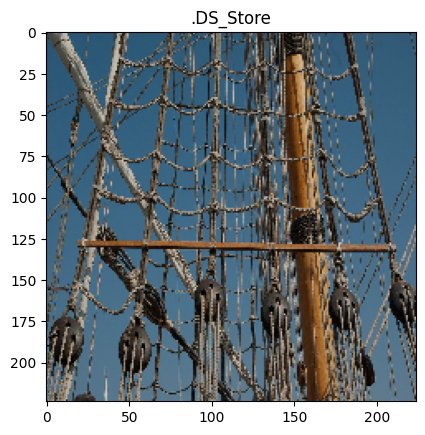

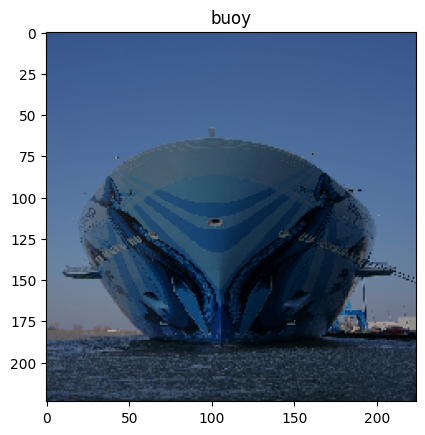

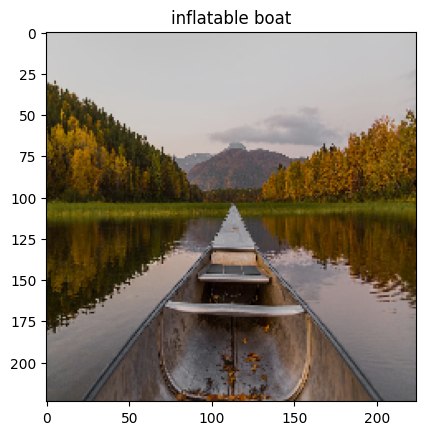

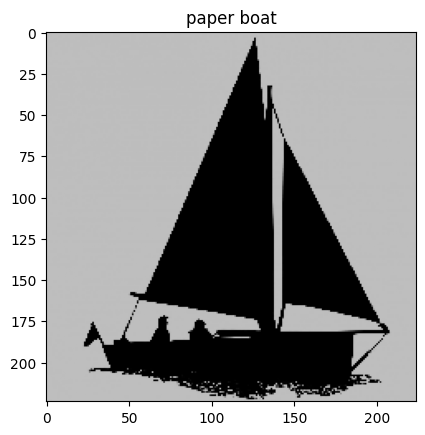

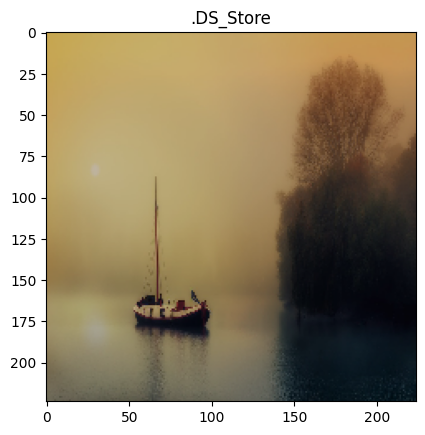

In [6]:
imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
    plt.imshow(img)
    #plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    value=np.argmax(label)
    plt.title(reverse_mapping[value])
    plt.show()

# Transfer Learning 

### Import a pretrained model
https://www.tensorflow.org/api_docs/python/tf/keras/applications/InceptionV3

In [7]:
base_model = tf.keras.applications.InceptionV3(input_shape=(224,224,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )

### Set the weights of the imported model

In [8]:
base_model.trainable = False

### Create model

In [9]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(Names), activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 2048)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 11)                90123     
                                                                 
Total params: 21892907 (83.51 MB)
Trainable params: 90123 (352.04 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


### Compile model

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

### Train the model

In [12]:
model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, 
          steps_per_epoch=8, epochs=40) #8,64

Epoch 1/40


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/Users/tanishq/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/Users/tanishq/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/tanishq/anaconda3/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/Users/tanishq/anaconda3/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/Users/tanishq/anaconda3/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/d7/dgzc3lys7m38jr9h53x36cqm0000gn/T/ipykernel_6064/3422711985.py", line 1, in <module>

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1127, in train_step

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1185, in compute_loss

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/Users/tanishq/anaconda3/lib/python3.10/site-packages/keras/src/backend.py", line 5777, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [16,11] and labels shape [160]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_14069]

### Visualize accuracy and loss

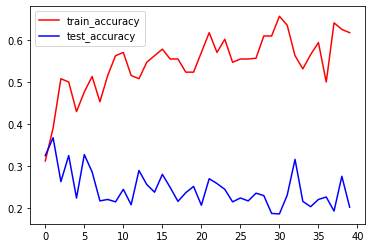

In [ ]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

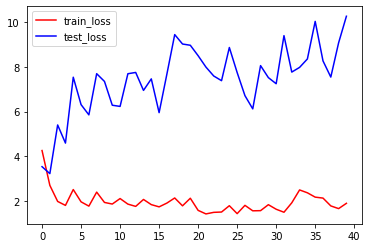

In [ ]:
# Visualise train / Valid Loss
plt.plot(model.history.history["loss"], c="r", label="train_loss")
plt.plot(model.history.history["val_loss"], c="b", label="test_loss")
plt.legend(loc="upper left")
plt.show()

# Interpretation with Grad Cam


### Create imgs and labels

In [ ]:
imgs, labels = next(iter(img_generator_flow_valid))
#timgs, tlabels = next(iter(img_generator_flow_test))

In [ ]:
for layer in model.layers:
    print(layer.name)

inception_v3
max_pooling2d_4
flatten
dense


In [ ]:
base_model = model.layers[0]

In [ ]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True)

In [ ]:
for layer in base_model.layers:
    print(layer.name)

input_1
conv2d
batch_normalization
activation
conv2d_1
batch_normalization_1
activation_1
conv2d_2
batch_normalization_2
activation_2
max_pooling2d
conv2d_3
batch_normalization_3
activation_3
conv2d_4
batch_normalization_4
activation_4
max_pooling2d_1
conv2d_8
batch_normalization_8
activation_8
conv2d_6
conv2d_9
batch_normalization_6
batch_normalization_9
activation_6
activation_9
average_pooling2d
conv2d_5
conv2d_7
conv2d_10
conv2d_11
batch_normalization_5
batch_normalization_7
batch_normalization_10
batch_normalization_11
activation_5
activation_7
activation_10
activation_11
mixed0
conv2d_15
batch_normalization_15
activation_15
conv2d_13
conv2d_16
batch_normalization_13
batch_normalization_16
activation_13
activation_16
average_pooling2d_1
conv2d_12
conv2d_14
conv2d_17
conv2d_18
batch_normalization_12
batch_normalization_14
batch_normalization_17
batch_normalization_18
activation_12
activation_14
activation_17
activation_18
mixed1
conv2d_22
batch_normalization_22
activation_22
conv2d

In [ ]:
last_conv_layer_name = "mixed10"
classifier_layer_names = [layer.name for layer in model.layers][1:]

In [ ]:
# We start by setting up the dependencies we will use

import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### make_gradcam_heatmap

In [ ]:
# The Grad-CAM algorithm
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, base_model, model, last_conv_layer_name, classifier_layer_names):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = base_model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(base_model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

### Predict

In [ ]:
# Print what the top predicted class is
preds = model.predict(imgs)
pred_labels = tf.argmax(preds, axis = -1)

print("Prediction output:", preds)
print("Predicted label:", pred_labels)

Prediction output: [[8.8400205e-18 5.6030133e-23 1.0000000e+00 8.2641742e-17 6.2821763e-20
  6.7630578e-17 9.1134810e-23 4.3367377e-20 3.5195078e-20 5.0490091e-19]
 [1.9513335e-10 4.7734360e-19 1.0000000e+00 4.9776805e-10 9.9779768e-12
  1.1766492e-10 2.5519302e-18 3.2707991e-14 4.4163133e-16 4.1742041e-13]
 [1.5042282e-14 1.1211985e-24 1.0000000e+00 1.1867090e-16 2.1891941e-18
  6.2802271e-15 1.7764217e-21 6.3336491e-19 8.2271707e-20 2.6205533e-17]
 [9.9890268e-01 1.0265574e-09 3.9917609e-07 5.0004793e-08 4.2859091e-11
  5.0838734e-04 2.3896257e-07 5.6708109e-04 1.8216992e-05 3.0213303e-06]
 [2.4114160e-16 7.0828722e-23 1.0000000e+00 4.9416965e-13 4.4328351e-17
  5.3521674e-15 5.7116325e-21 2.5437549e-19 3.7418849e-19 2.1844153e-17]
 [9.8698914e-01 3.5408557e-06 8.4273270e-06 1.5336781e-08 8.5864052e-08
  8.9029796e-05 1.3112823e-07 9.7004231e-06 1.2453970e-02 4.4592103e-04]
 [1.8158128e-02 4.9947495e-09 2.0713823e-01 7.7458692e-01 3.6410289e-05
  5.3016706e-06 2.5271201e-09 4.8730297

### Create heatmap

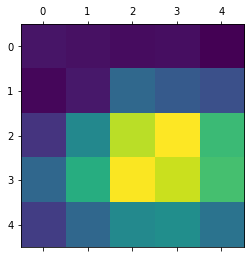

In [ ]:
# Generate class activation heatmap
heatmaps = []

for img in imgs:
    heatmap = make_gradcam_heatmap(
    tf.expand_dims(img,axis=0),
        base_model, model, 
        last_conv_layer_name, 
        classifier_layer_names
  )
    heatmaps.append(heatmap)


# Display heatmap
plt.matshow(heatmaps[0])
plt.show()


### Predicted label and heatmap

Predicted label: cruise ship
True label: buoy


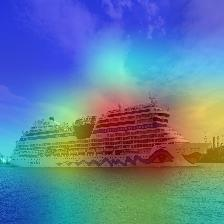

Predicted label: cruise ship
True label: buoy


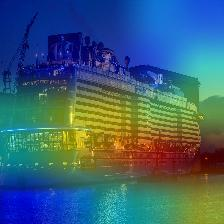

Predicted label: cruise ship
True label: cruise ship


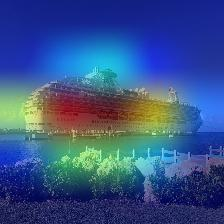

Predicted label: buoy
True label: kayak


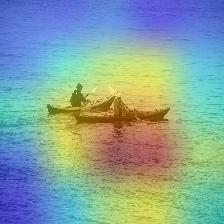

Predicted label: cruise ship
True label: buoy


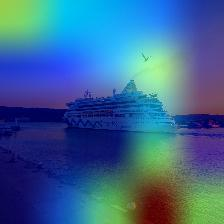

Predicted label: buoy
True label: buoy


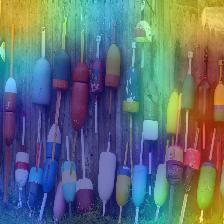

Predicted label: ferry boat
True label: buoy


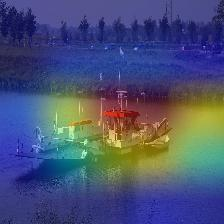

Predicted label: buoy
True label: buoy


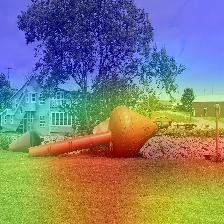

Predicted label: cruise ship
True label: buoy


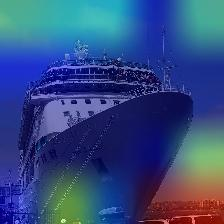

Predicted label: buoy
True label: sailboat


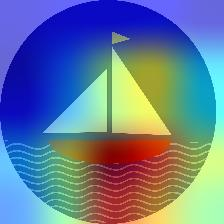

Predicted label: buoy
True label: sailboat


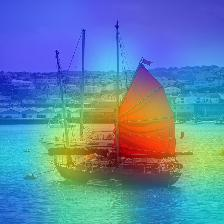

Predicted label: cruise ship
True label: ferry boat


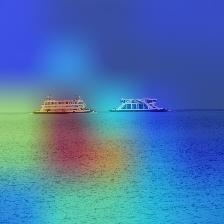

Predicted label: cruise ship
True label: buoy


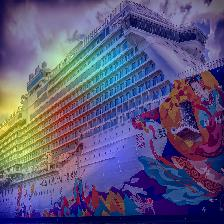

Predicted label: buoy
True label: buoy


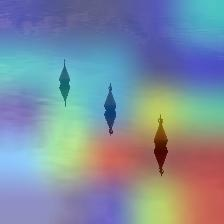

Predicted label: cruise ship
True label: cruise ship


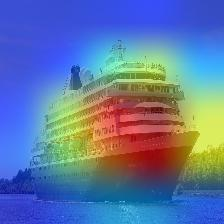

Predicted label: cruise ship
True label: buoy


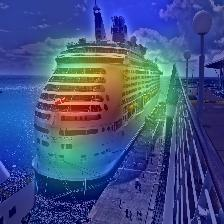

In [ ]:
from pathlib import Path

for img, pred_label, true_label, heatmap in zip(imgs, pred_labels, labels, heatmaps): 
    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.003 + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    save_path = "saved_img.jpg"
    superimposed_img.save(save_path)

    # Display Grad CAM
    pred_file_path = np.argmax(img_generator_flow_valid.labels == pred_label)
    pred_label_name = Path(img_generator_flow_valid.filepaths[pred_file_path]).parent.name

    true_file_path = np.argmax(img_generator_flow_valid.labels == tf.argmax(true_label))
    true_label_name = Path(img_generator_flow_valid.filepaths[true_file_path]).parent.name

    print("Predicted label:",pred_label_name)
    print("True label:", true_label_name)

    display(Image(save_path))

In [ ]:
LABEL=[]
for item in labels:
    LABEL+=[np.argmax(item)]
PRED=pred_labels.numpy().tolist()

In [ ]:
print(LABEL)
print(PRED)

[0, 0, 2, 7, 0, 1, 0, 1, 0, 9, 9, 3, 0, 0, 2, 0]
[2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 0, 2, 2, 0, 2, 2]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(LABEL,PRED))

              precision    recall  f1-score   support

           0       0.17      0.12      0.14         8
           1       0.00      0.00      0.00         2
           2       0.22      1.00      0.36         2
           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2

    accuracy                           0.19        16
   macro avg       0.06      0.19      0.08        16
weighted avg       0.11      0.19      0.12        16



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
